# Regularization and Gradient Descent Exercises
![UnderOverFit.png](Assets/UnderOverFit.png)


# Learning Objectives

- Explain cost functions, regularization, feature selection, and hyper-parameters
- Summarize complex statistical optimization algorithms like gradient descent and its application to linear regression
- Apply Intel® Extension for Scikit-learn* to leverage underlying compute capabilities of hardware

# scikit-learn* 

Frameworks provide structure that Data Scientists use to build code. Frameworks are more than just libraries, because in addition to callable code, frameworks influence how code is written. 

A main virtue of using an optimized framework is that code runs faster. Code that runs faster is just generally more convenient but when we begin looking at applied data science and AI models, we can see more material benefits. Here you will see how optimization, particularly hyperparameter optimization can benefit more than just speed. 

These exercises will demonstrate how to apply **the Intel® Extension for Scikit-learn*,** a seamless way to speed up your Scikit-learn application. The acceleration is achieved through the use of the Intel® oneAPI Data Analytics Library (oneDAL). Patching is the term used to extend scikit-learn with Intel optimizations and makes it a well-suited machine learning framework for dealing with real-life problems. 

To get optimized versions of many Scikit-learn algorithms using a patch() approach consisting of adding these lines of code prior to importing sklearn: 

- **from sklearnex import patch_sklearn**
- **patch_sklearn()**

## This exercise relies on installation of  Intel® Extension for Scikit-learn*

If you have not already done so, follow the instructions from Week 1 for instructions


## Introduction

We will begin with a short tutorial on regression, polynomial features, and regularization based on a very simple, sparse data set that contains a column of `x` data and associated `y` noisy data. The data file is called `X_Y_Sinusoid_Data.csv`. 

In [3]:
from __future__ import print_function
import os
data_path = ['X_Y_Sinusoid_Data.csv']

from sklearnex import patch_sklearn
patch_sklearn()

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import MinMaxScaler


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


## Question 1

* Import the data. 

* Also generate approximately 100 equally spaced x data points over the range of 0 to 1. Using these points, calculate the y-data which represents the "ground truth" (the real function) from the equation: $y = sin(2\pi x)$

* Plot the sparse data (`x` vs `y`) and the calculated ("real") data.


<>:19: SyntaxWarning: invalid escape sequence '\s'
<>:19: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_10142/2307964240.py:19: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(x_real, y_real, color='blue', label='Ground Truth: $y = \sin(2\pi x)$')


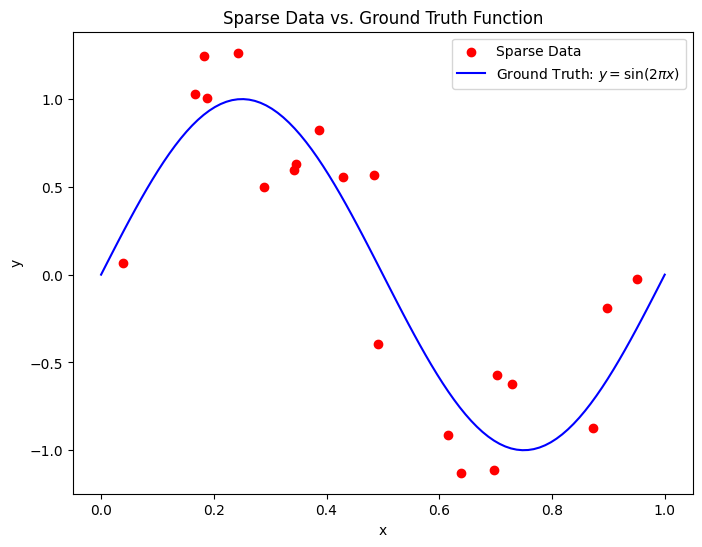

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_path = 'X_Y_Sinusoid_Data.csv'
df = pd.read_csv(data_path)


x_sparse = df['x'].values
y_sparse = df['y'].values

x_real = np.linspace(0, 1, 100)

y_real = np.sin(2 * np.pi * x_real)


plt.figure(figsize=(8, 6))
plt.scatter(x_sparse, y_sparse, color='red', label='Sparse Data')
plt.plot(x_real, y_real, color='blue', label='Ground Truth: $y = \sin(2\pi x)$')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Sparse Data vs. Ground Truth Function')
plt.show()


## Question 2


* Using the `PolynomialFeatures` class from Scikit-learn's preprocessing library, create 20th order polynomial features.
* Fit this data using linear regression. 
* Plot the resulting predicted value compared to the calculated data.

Note that `PolynomialFeatures` requires either a dataframe (with one column, not a Series) or a 2D array of dimension (`X`, 1), where `X` is the length.

<>:15: SyntaxWarning: invalid escape sequence '\s'
<>:15: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_10142/278409483.py:15: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(x_real, y_real, color='blue', label='Ground Truth: $y = \sin(2\pi x)$')


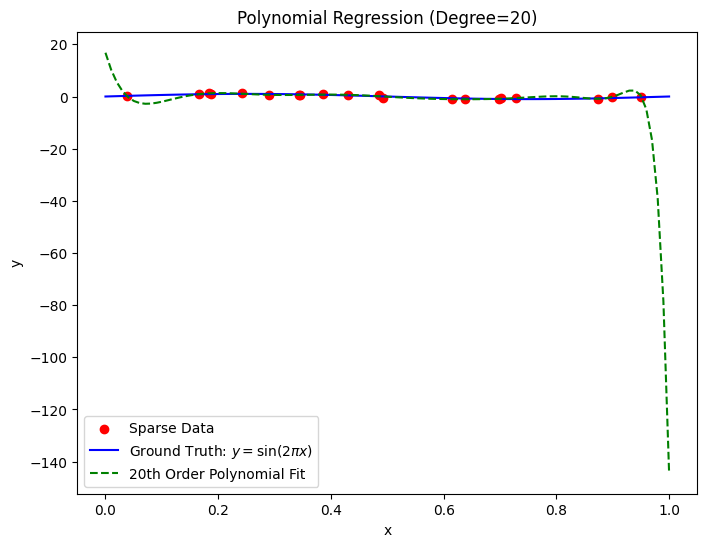

In [8]:
degree = 20
pf = PolynomialFeatures(degree)

X_sparse_poly = pf.fit_transform(x_sparse.reshape(-1, 1))

lr = LinearRegression()
lr.fit(X_sparse_poly, y_sparse)

X_real_poly = pf.transform(x_real.reshape(-1, 1))

y_pred = lr.predict(X_real_poly)

plt.figure(figsize=(8, 6))
plt.scatter(x_sparse, y_sparse, color='red', label='Sparse Data')
plt.plot(x_real, y_real, color='blue', label='Ground Truth: $y = \sin(2\pi x)$')
plt.plot(x_real, y_pred, color='green', linestyle='dashed', label='20th Order Polynomial Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Polynomial Regression (Degree=20)')
plt.show()


## Question 3

* Perform the regression on using the data with polynomial features using ridge regression ($\alpha$=0.001) and lasso regression ($\alpha$=0.0001). 
* Plot the results, as was done in Question 1. 
* Also plot the magnitude of the coefficients obtained from these regressions, and compare them to those obtained from linear regression in the previous question. The linear regression coefficients will likely need a separate plot (or their own y-axis) due to their large magnitude. 

What does the comparatively large magnitude of the data tell you about the role of regularization?

<>:18: SyntaxWarning: invalid escape sequence '\s'
<>:18: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_10142/169913401.py:18: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(x_real, y_real, color='blue', label='Ground Truth: $y = \sin(2\pi x)$')


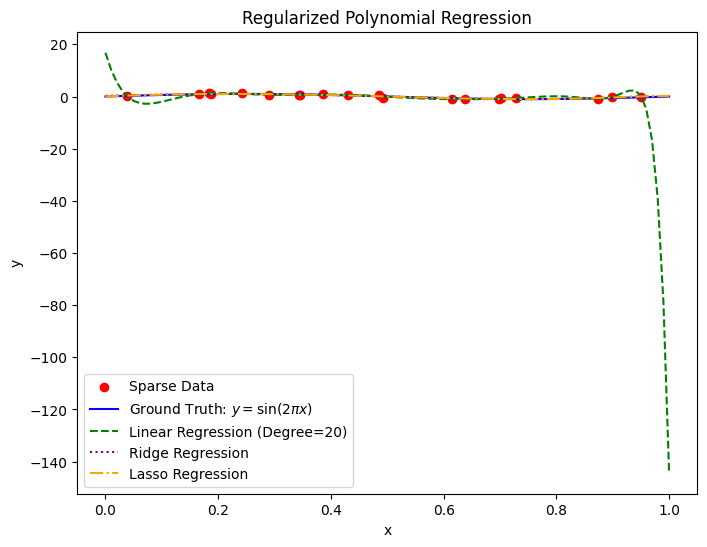

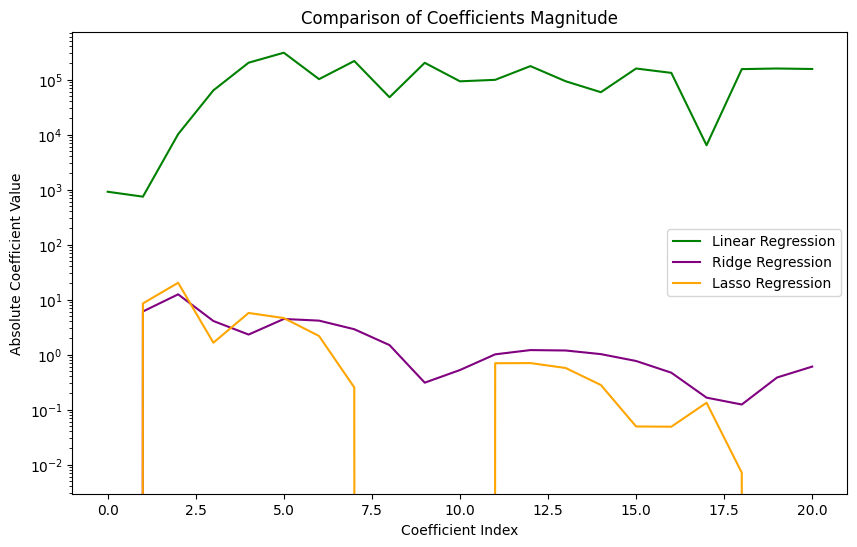

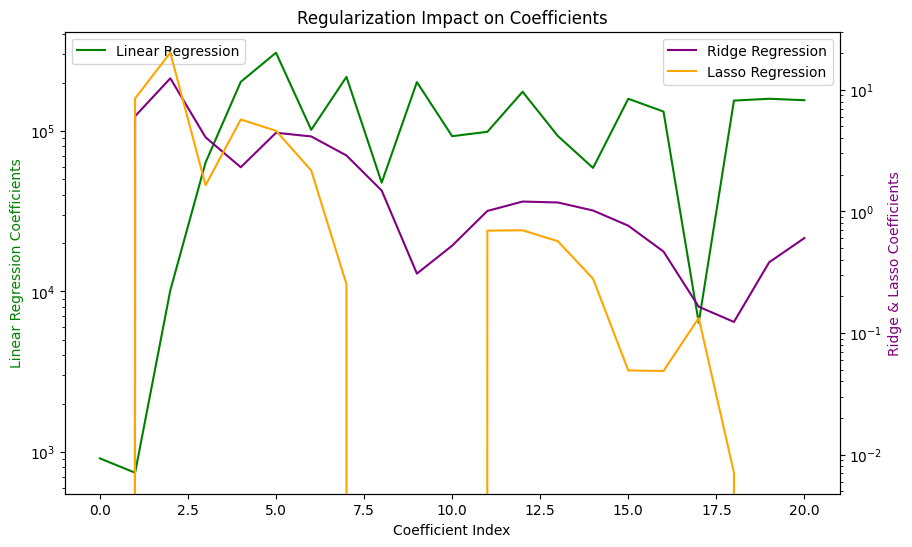

In [9]:
import warnings
warnings.filterwarnings('ignore', module='sklearn')

alpha_ridge = 0.001
alpha_lasso = 0.0001

ridge = Ridge(alpha=alpha_ridge)
lasso = Lasso(alpha=alpha_lasso)

ridge.fit(X_sparse_poly, y_sparse)
lasso.fit(X_sparse_poly, y_sparse)

y_ridge_pred = ridge.predict(X_real_poly)
y_lasso_pred = lasso.predict(X_real_poly)

plt.figure(figsize=(8, 6))
plt.scatter(x_sparse, y_sparse, color='red', label='Sparse Data')
plt.plot(x_real, y_real, color='blue', label='Ground Truth: $y = \sin(2\pi x)$')
plt.plot(x_real, y_pred, color='green', linestyle='dashed', label='Linear Regression (Degree=20)')
plt.plot(x_real, y_ridge_pred, color='purple', linestyle='dotted', label='Ridge Regression')
plt.plot(x_real, y_lasso_pred, color='orange', linestyle='dashdot', label='Lasso Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Regularized Polynomial Regression')
plt.show()

coefficients = pd.DataFrame()
coefficients['Linear'] = lr.coef_.flatten()
coefficients['Ridge'] = ridge.coef_.flatten()
coefficients['Lasso'] = lasso.coef_.flatten()

plt.figure(figsize=(10, 6))
plt.plot(np.abs(coefficients['Linear']), label='Linear Regression', color='green')
plt.plot(np.abs(coefficients['Ridge']), label='Ridge Regression', color='purple')
plt.plot(np.abs(coefficients['Lasso']), label='Lasso Regression', color='orange')
plt.xlabel('Coefficient Index')
plt.ylabel('Absolute Coefficient Value')
plt.yscale('log')
plt.legend()
plt.title('Comparison of Coefficients Magnitude')
plt.show()

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()
ax1.plot(np.abs(coefficients['Linear']), label='Linear Regression', color='green')
ax2.plot(np.abs(coefficients['Ridge']), label='Ridge Regression', color='purple')
ax2.plot(np.abs(coefficients['Lasso']), label='Lasso Regression', color='orange')

ax1.set_xlabel('Coefficient Index')
ax1.set_ylabel('Linear Regression Coefficients', color='green')
ax2.set_ylabel('Ridge & Lasso Coefficients', color='purple')
ax1.set_yscale('log')
ax2.set_yscale('log')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title('Regularization Impact on Coefficients')
plt.show()


## Question 4

For the remaining questions, we will be working with the [data set](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) from last lesson, which is based on housing prices in Ames, Iowa. There are an extensive number of features--see the exercises from week three for a discussion of these features.

To begin:

* Import the data with Pandas, remove any null values, and one hot encode categoricals. Either Scikit-learn's feature encoders or Pandas `get_dummies` method can be used.
* Split the data into train and test sets. 
* Log transform skewed features. 
* Scaling can be attempted, although it can be interesting to see how well regularization works without scaling features.

In [11]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split

# Load the dataset
filepath = os.sep.join(['Ames_Housing_Sales.csv'])
data1 = pd.read_csv(filepath)

# Fill missing values instead of dropping all rows
data = data1.fillna(data1.median(numeric_only=True))  # Fill numeric columns with median
data = data.fillna("None")  # Fill categorical columns with "None"

# Identify categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns

# One-hot encode categorical variables
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Ensure 'SalePrice' exists before splitting
if 'SalePrice' not in data.columns:
    raise ValueError("SalePrice column is missing from the dataset!")

# Separate features and target variable
X = data.drop(columns=['SalePrice'])
y = data['SalePrice']

# Ensure we have valid data before splitting
if X.shape[0] == 0:
    raise ValueError("X is empty after preprocessing. Check data transformations.")

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify skewed features
numeric_cols = X_train.select_dtypes(include=[np.number]).columns
skewness = X_train[numeric_cols].apply(lambda x: x.skew())
skewed_features = skewness[skewness > 0.75].index

# Apply log transformation to skewed features (excluding SalePrice)
X_train[skewed_features] = np.log1p(X_train[skewed_features])
X_test[skewed_features] = np.log1p(X_test[skewed_features])

# Display transformed dataset
X_train.head()


,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Pave,Utilities_NoSeWa
1105,7.020191,0.0,0.000000,3,6.259581,0.000000,1,0.000000,6.354370,0.0,...,False,False,False,False,False,False,False,True,True,False
309,7.455298,0.0,0.000000,6,3.713572,5.579730,0,0.693147,7.261927,0.0,...,False,False,False,False,False,False,False,True,True,False
915,6.999422,0.0,0.000000,2,6.242223,0.000000,1,0.000000,4.330733,0.0,...,False,False,True,False,False,False,False,False,True,False
682,7.427144,0.0,5.209486,3,6.695799,0.000000,1,0.000000,4.290459,0.0,...,False,False,False,False,False,False,False,True,True,False
1236,7.023759,0.0,0.000000,2,4.976734,6.411818,1,0.000000,5.153292,0.0,...,False,False,False,False,False,False,False,True,True,False


## Question 5

* Write a function **`rmse`** that takes in truth and prediction values and returns the root-mean-squared error. Use sklearn's `mean_squared_error`.  


In [12]:
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.linear_model import LinearRegression

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Train a basic linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict on test set
y_pred = lr.predict(X_test)

# Compute RMSE
error = rmse(y_test, y_pred)
print(f"RMSE on Test Set: {error:.2f}")


RMSE on Test Set: 67819.16


* Fit a basic linear regression model
* print the root-mean-squared error for this model
* plot the predicted vs actual sale price based on the model.  

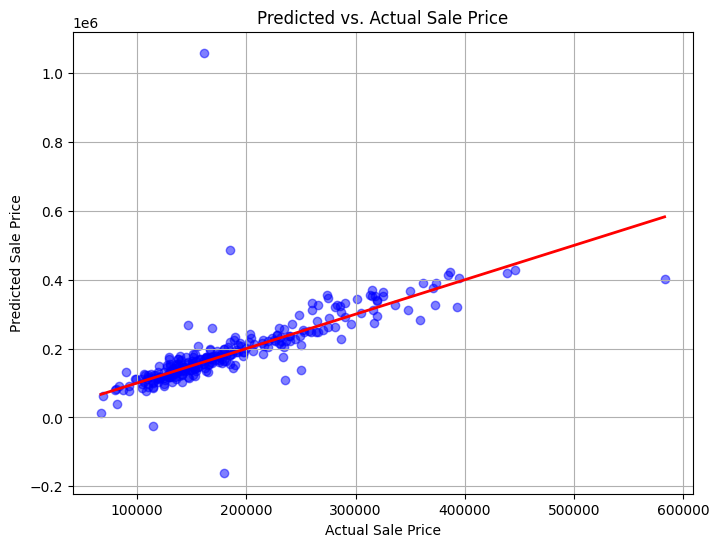

In [13]:
import matplotlib.pyplot as plt

# Scatter plot of predicted vs actual sale prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2)  # Identity line

plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Predicted vs. Actual Sale Price")
plt.grid(True)
plt.show()


## Question 6

Ridge regression uses L2 normalization to reduce the magnitude of the coefficients. This can be helpful in situations where there is high variance. The regularization functions in Scikit-learn each contain versions that have cross-validation built in.

* Fit a regular (non-cross validated) Ridge model to a range of $\alpha$ values and plot the RMSE using the cross validated error function you created above.
* Use $$[0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]$$ as the range of alphas.
* Then repeat the fitting of the Ridge models using the range of $\alpha$ values from the prior section. Compare the results.

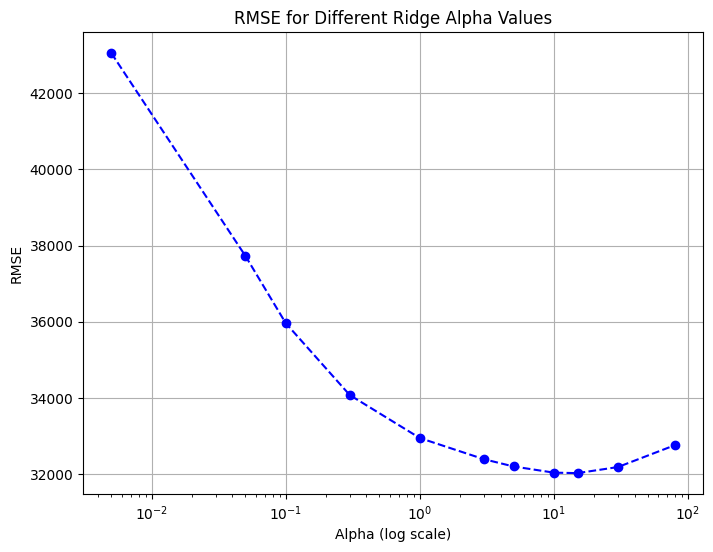

In [14]:
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

# Define the range of alpha values
alpha_values = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]
rmse_values = []

# Train Ridge regression models for each alpha and compute RMSE
for alpha in alpha_values:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred_ridge = ridge.predict(X_test)
    rmse_values.append(rmse(y_test, y_pred_ridge))

# Plot RMSE vs. alpha values
plt.figure(figsize=(8, 6))
plt.plot(alpha_values, rmse_values, marker='o', linestyle='dashed', color='b')
plt.xscale('log')  # Log scale for better visualization
plt.xlabel("Alpha (log scale)")
plt.ylabel("RMSE")
plt.title("RMSE for Different Ridge Alpha Values")
plt.grid(True)
plt.show()


Now for the `RidgeCV` method. It's not possible to get the alpha values for the models that weren't selected, unfortunately. The resulting error values and $\alpha$ values are very similar to those obtained above.

In [15]:
from sklearn.linear_model import RidgeCV

# Define the range of alpha values for cross-validation
alpha_values = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]

# Fit RidgeCV model
ridge_cv = RidgeCV(alphas=alpha_values, store_cv_values=True)
ridge_cv.fit(X_train, y_train)

# Predict and compute RMSE
y_pred_ridge_cv = ridge_cv.predict(X_test)
ridge_cv_rmse = rmse(y_test, y_pred_ridge_cv)

# Best alpha selected by RidgeCV
best_alpha = ridge_cv.alpha_

# Print results
print(f"Best Alpha Selected by RidgeCV: {best_alpha}")
print(f"RMSE with RidgeCV: {ridge_cv_rmse:.2f}")


Best Alpha Selected by RidgeCV: 10.0
RMSE with RidgeCV: 32035.46


## Question 7


Much like the `RidgeCV` function, there is also a `LassoCV` function that uses an L1 regularization function and cross-validation. L1 regularization will selectively shrink some coefficients, effectively performing feature elimination.

The `LassoCV` function does not allow the scoring function to be set. However, the custom error function (`rmse`) created above can be used to evaluate the error on the final model.

Similarly, there is also an elastic net function with cross validation, `ElasticNetCV`, which is a combination of L2 and L1 regularization.

* Fit a Lasso model using cross validation and determine the optimum value for $\alpha$ and the RMSE using the function created above. Note that the magnitude of $\alpha$ may be different from the Ridge model.
* Repeat this with the Elastic net model.
* Compare the results via table and/or plot.

Use the following alphas:  
`[1e-5, 5e-5, 0.0001, 0.0005]`

In [16]:
from sklearn.linear_model import LassoCV, ElasticNetCV

# Define the range of alpha values
alpha_values = [1e-5, 5e-5, 0.0001, 0.0005]

# Fit LassoCV model
lasso_cv = LassoCV(alphas=alpha_values, cv=5, max_iter=5000)
lasso_cv.fit(X_train, y_train)
y_pred_lasso = lasso_cv.predict(X_test)
lasso_rmse = rmse(y_test, y_pred_lasso)
best_alpha_lasso = lasso_cv.alpha_

# Fit ElasticNetCV model
elastic_cv = ElasticNetCV(alphas=alpha_values, cv=5, l1_ratio=0.5, max_iter=5000)
elastic_cv.fit(X_train, y_train)
y_pred_elastic = elastic_cv.predict(X_test)
elastic_rmse = rmse(y_test, y_pred_elastic)
best_alpha_elastic = elastic_cv.alpha_

# Print results
print(f"Best Alpha (LassoCV): {best_alpha_lasso}")
print(f"RMSE (LassoCV): {lasso_rmse:.2f}")

print(f"Best Alpha (ElasticNetCV): {best_alpha_elastic}")
print(f"RMSE (ElasticNetCV): {elastic_rmse:.2f}")


Best Alpha (LassoCV): 0.0005
RMSE (LassoCV): 43462.76
Best Alpha (ElasticNetCV): 0.0005
RMSE (ElasticNetCV): 34186.14


In [17]:
import pandas as pd

# Create comparison table
results = pd.DataFrame({
    "Model": ["LassoCV", "ElasticNetCV"],
    "Best Alpha": [best_alpha_lasso, best_alpha_elastic],
    "RMSE": [lasso_rmse, elastic_rmse]
})

# Display table
print(results)


          Model  Best Alpha          RMSE
0       LassoCV      0.0005  43462.763061
1  ElasticNetCV      0.0005  34186.142002


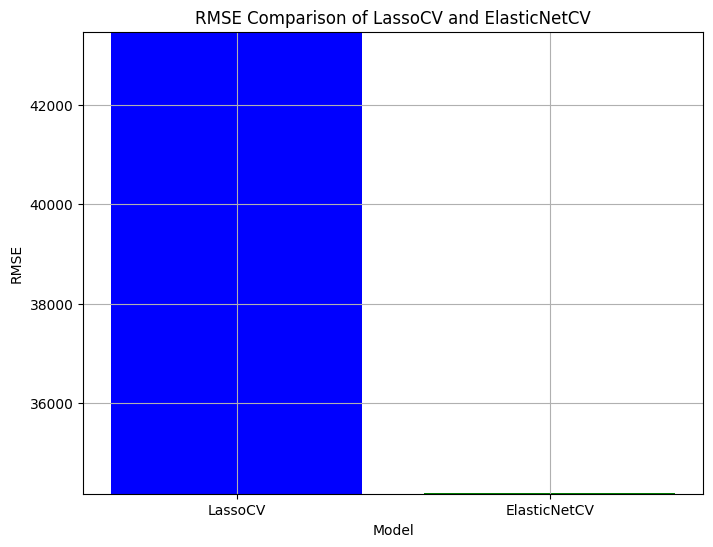

In [18]:
import matplotlib.pyplot as plt

# Bar plot comparison
plt.figure(figsize=(8, 6))
plt.bar(["LassoCV", "ElasticNetCV"], [lasso_rmse, elastic_rmse], color=['blue', 'green'])
plt.xlabel("Model")
plt.ylabel("RMSE")
plt.title("RMSE Comparison of LassoCV and ElasticNetCV")
plt.ylim(min(lasso_rmse, elastic_rmse) - 5, max(lasso_rmse, elastic_rmse) + 5)
plt.grid(True)
plt.show()

We can determine how many of these features remain non-zero.

In [19]:
# Count the number of non-zero coefficients
num_nonzero_lasso = np.sum(lasso_cv.coef_ != 0)
num_nonzero_elastic = np.sum(elastic_cv.coef_ != 0)

# Print results
print(f"Number of Non-Zero Coefficients (LassoCV): {num_nonzero_lasso}")
print(f"Number of Non-Zero Coefficients (ElasticNetCV): {num_nonzero_elastic}")


Number of Non-Zero Coefficients (LassoCV): 241
Number of Non-Zero Coefficients (ElasticNetCV): 242


Now try the elastic net, with the same alphas as in Lasso, and l1_ratios between 0.1 and 0.9

In [20]:
# Define alpha and l1_ratio values
alpha_values = [1e-5, 5e-5, 0.0001, 0.0005]
l1_ratios = np.linspace(0.1, 0.9, 9)  # Generates values from 0.1 to 0.9

# Fit ElasticNetCV model with different l1_ratios
elastic_cv = ElasticNetCV(alphas=alpha_values, l1_ratio=l1_ratios, cv=5, max_iter=5000)
elastic_cv.fit(X_train, y_train)

# Predict and compute RMSE
y_pred_elastic = elastic_cv.predict(X_test)
elastic_rmse = rmse(y_test, y_pred_elastic)

# Get best alpha and l1_ratio
best_alpha_elastic = elastic_cv.alpha_
best_l1_ratio = elastic_cv.l1_ratio_

# Count non-zero coefficients
num_nonzero_elastic = np.sum(elastic_cv.coef_ != 0)

# Print results
print(f"Best Alpha (ElasticNetCV): {best_alpha_elastic}")
print(f"Best l1_ratio (ElasticNetCV): {best_l1_ratio}")
print(f"RMSE (ElasticNetCV): {elastic_rmse:.2f}")
print(f"Number of Non-Zero Coefficients (ElasticNetCV): {num_nonzero_elastic}")


Best Alpha (ElasticNetCV): 0.0005
Best l1_ratio (ElasticNetCV): 0.1
RMSE (ElasticNetCV): 33502.52
Number of Non-Zero Coefficients (ElasticNetCV): 242


## Question 8

Let's explore Stochastic gradient descent in this exercise.  
Recall that Linear models in general are sensitive to scaling.
However, SGD is *very* sensitive to scaling.  
Moreover, a high value of learning rate can cause the algorithm to diverge, whereas a too low value may take too long to converge.

* Fit a stochastic gradient descent model without a regularization penalty (the relevant parameter is `penalty`).
* Now fit stochastic gradient descent models with each of the three penalties (L2, L1, Elastic Net) using the parameter values determined by cross validation above. 
* Do not scale the data before fitting the model.  
* Compare the results to those obtained without using stochastic gradient descent.

Notice how high the error values are! The algorithm is diverging. This can be due to scaling and/or learning rate being too high. Let's adjust the learning rate and see what happens.

* Pass in `eta0=1e-7` when creating the instance of `SGDClassifier`.
* Re-compute the errors for all the penalties and compare.

Now let's scale our training data and try again.

* Fit a `MinMaxScaler` to `X_train` create a variable `X_train_scaled`.
* Using the scaler, transform `X_test` and create a variable `X_test_scaled`. 
* Apply the same versions of SGD to them and compare the results. Don't pass in a eta0 this time.

In [ ]:
scaler = MinMaxScaler()


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
